In [102]:
pip install python-rake

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [103]:
import numpy as np
import pandas as pd
import pickle
from IPython.display import Markdown, display
import matplotlib.pyplot as plt
from scipy import spatial
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import RAKE

In [106]:
rake = RAKE.Rake("./RAKE/SmartStoplist.txt")

In [2]:
def printmd(string):
    display(Markdown(string))

In [3]:
business = pd.read_json('./Data/yelp_academic_dataset_business.json', lines =  True)
print(business.shape)


# Only open businesses & with categories
business = business[business.is_open == 1]
business.drop(columns = ['address','is_open', 'latitude', 'longitude'], inplace = True)
#business = business[business.categories.apply(len) != 0]
business.head()

(209393, 14)


,business_id,name,city,state,postal_code,stars,review_count,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,Cornelius,NC,28031,3.5,36,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD",Scottsdale,AZ,85258,5.0,4,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,Montreal,QC,H4C 1P4,5.0,5,None,"Pets, Pet Services, Pet Groomers",None
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,Mesa,AZ,85205,4.5,26,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."
5,cKyLV5oWZJ2NudWgqs8VZw,Oasis Auto Center - Gilbert,Gilbert,AZ,85233,4.5,38,{'BusinessAcceptsCreditCards': 'True'},"Auto Repair, Automotive, Oil Change Stations, ...","{'Monday': '7:0-18:0', 'Tuesday': '7:0-18:0', ..."


In [4]:
print('Size : ',business.shape)
display(business.info())

Size :  (168903, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 168903 entries, 0 to 209392
Data columns (total 10 columns):
business_id     168903 non-null object
name            168903 non-null object
city            168903 non-null object
state           168903 non-null object
postal_code     168903 non-null object
stars           168903 non-null float64
review_count    168903 non-null int64
attributes      143470 non-null object
categories      168401 non-null object
hours           137502 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 14.2+ MB


None

##Review Data

In [5]:
# Takes a lot of time to read
review = pd.DataFrame()

df = pd.read_json('./Data/yelp_academic_dataset_review.json',lines = True, chunksize= 1e5)

In [6]:
try:
   for df_chunk in df:
       review = pd.concat([review, df_chunk])
except ValueError:
       print ('\nSome messages in the file cannot be parsed')

In [7]:
review.drop(columns = ['cool','funny'], inplace = True)

print(review.shape)

review.head()

(8021122, 7)


,review_id,user_id,business_id,stars,useful,text,date
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2,5,"As someone who has worked with many museums, I...",2015-04-15 05:21:16
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1,1,I am actually horrified this place is still in...,2013-12-07 03:16:52
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5,1,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1,0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4,0,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57


In [27]:
review['review_length'] = review.text.apply(len)

In [28]:
review

,review_id,user_id,business_id,stars,useful,text,date,review_length
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2,5,"As someone who has worked with many museums, I...",2015-04-15 05:21:16,1373
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1,1,I am actually horrified this place is still in...,2013-12-07 03:16:52,1407
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5,1,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11,431
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1,0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52,401
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4,0,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57,841
...,...,...,...,...,...,...,...,...
8021117,LAzw2u1ucY722ryLEXHdgg,6DMFD3BRp-MVzDQelRx5UQ,XW2kaXdahICaJ27A0dhGHg,1,1,"Fricken unbelievable, I ordered 2 space heater...",2019-12-11 01:07:06,770
8021118,gMDU14Fa_DVIcPvsKtubJA,_g6P8H3-qfbz1FxbffS68g,IsoLzudHC50oJLiEWpwV-w,3,1,Solid American food with a southern comfort fl...,2019-12-10 04:15:00,1444
8021119,EcY_p50zPIQ2R6rf6-5CjA,Scmyz7MK4TbXXYcaLZxIxQ,kDCyqlYcstqnoqnfBRS5Og,5,15,I'm honestly not sure how I have never been to...,2019-06-06 15:01:53,1225
8021120,-z_MM0pAf9RtZbyPlphTlA,lBuAACBEThaQHQGMzAlKpg,VKVDDHKtsdrnigeIf9S8RA,3,2,Food was decent but I will say the service too...,2018-07-05 18:45:21,327


In [9]:
review.describe()

,stars,useful
count,8.021122e+06,8.021122e+06
mean,3.703575e+00,1.322882e+00
std,1.490486e+00,3.550831e+00
min,1.000000e+00,-1.000000e+00
25%,3.000000e+00,0.000000e+00
50%,4.000000e+00,0.000000e+00
75%,5.000000e+00,1.000000e+00
max,5.000000e+00,1.122000e+03


In [10]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8021122 entries, 0 to 8021121
Data columns (total 7 columns):
review_id      object
user_id        object
business_id    object
stars          int64
useful         int64
text           object
date           datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 428.4+ MB


In [11]:
checkin = pd.read_json('./Data/yelp_academic_dataset_checkin.json', lines = True)
#checkin = pd.read_pickle('checkin.pkl')
print(checkin.shape)
checkin.head()

(175187, 2)


,business_id,date
0,--1UhMGODdWsrMastO9DZw,"2016-04-26 19:49:16, 2016-08-30 18:36:57, 2016..."
1,--6MefnULPED_I942VcFNA,"2011-06-04 18:22:23, 2011-07-23 23:51:33, 2012..."
2,--7zmmkVg-IMGaXbuVd0SQ,"2014-12-29 19:25:50, 2015-01-17 01:49:14, 2015..."
3,--8LPVSo5i0Oo61X01sV9A,2016-07-08 16:43:30
4,--9QQLMTbFzLJ_oT-ON3Xw,"2010-06-26 17:39:07, 2010-08-01 20:06:21, 2010..."


##User Data

In [12]:

user = pd.read_json('./Data/yelp_academic_dataset_user.json', lines = True)
#user = pd.read_pickle('user.pkl')

user_columns_to_remove = ['compliment_cool', 'compliment_cute',
       'compliment_funny', 'compliment_hot', 'compliment_list',
       'compliment_more', 'compliment_note', 'compliment_photos',
       'compliment_plain', 'compliment_profile', 'compliment_writer',
       'cool','fans', 'friends', 'funny',
       'useful', 'yelping_since']
user.drop(columns = user_columns_to_remove, inplace = True)

user.elite = user.elite.apply(lambda x: 0 if len(x) == 0 else 1)
elite_user_id = user[user.elite == 1].user_id.values
print(user.shape)
user.head()

(1968703, 5)


,user_id,name,review_count,elite,average_stars
0,ntlvfPzc8eglqvk92iDIAw,Rafael,553,0,3.57
1,FOBRPlBHa3WPHFB5qYDlVg,Michelle,564,1,3.84
2,zZUnPeh2hEp0WydbAZEOOg,Martin,60,1,3.44
3,QaELAmRcDc5TfJEylaaP8g,John,206,1,3.08
4,xvu8G900tezTzbbfqmTKvA,Anne,485,1,4.37


In [13]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968703 entries, 0 to 1968702
Data columns (total 5 columns):
user_id          object
name             object
review_count     int64
elite            int64
average_stars    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 75.1+ MB


#Exploratory Data Analysis

##Distribution of Reviews

In [14]:
dist_reviews = review.user_id.value_counts().value_counts()

Text(0.5, 0, 'Number of reviews')

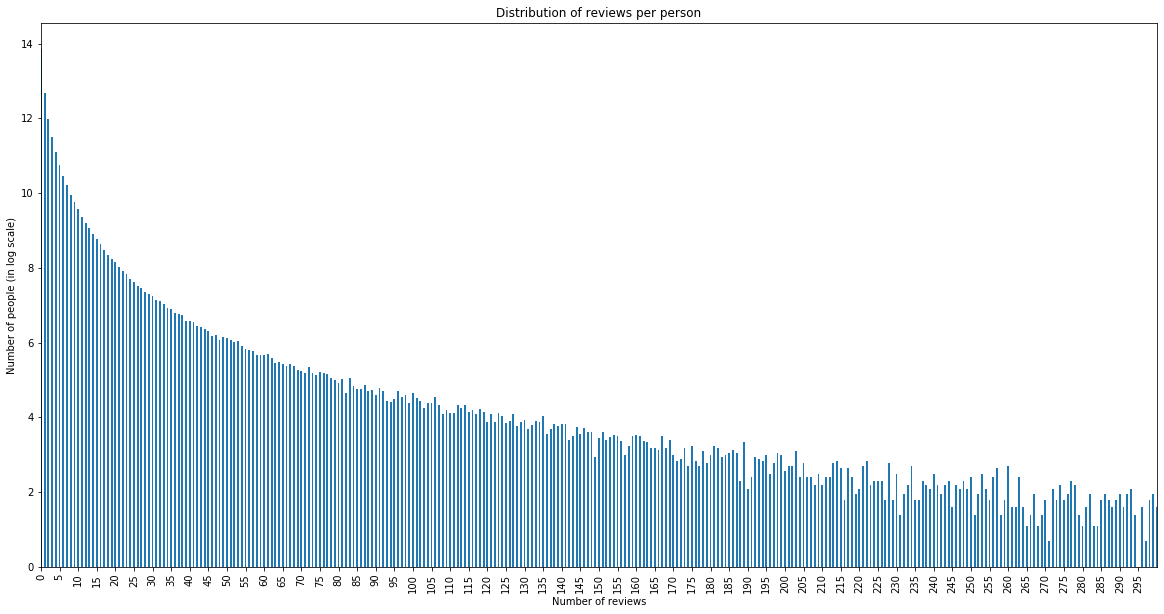

In [15]:
ax = np.log(dist_reviews).sort_index().plot(kind = 'bar', title = 'Distribution of reviews per person', figsize = (20,10))


ax.set_xlim(0, 300)
ax.set_xticklabels(np.arange(0, 300, 5))
ax.xaxis.set_ticks(np.arange(0, 300, 5))
ax.set_ylabel("Number of people (in log scale)")
ax.set_xlabel("Number of reviews")

Text(0.5, 0, 'Number of reviews')

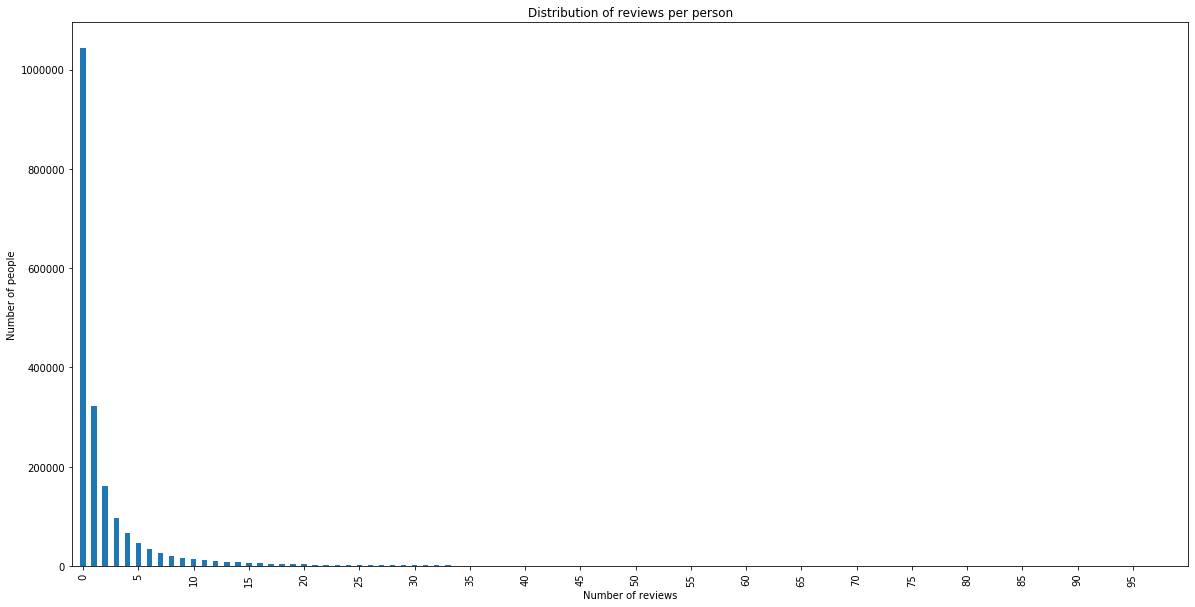

In [16]:
ax = dist_reviews.sort_index().plot(kind = 'bar', title = 'Distribution of reviews per person', figsize = (20,10))
ax.set_xlim(-1, 100)
ax.set_xticklabels(np.arange(0, 100, 5))
ax.xaxis.set_ticks(np.arange(0, 100, 5))
ax.set_ylabel("Number of people")
ax.set_xlabel("Number of reviews")

Text(0.5, 0, 'Number of reviews')

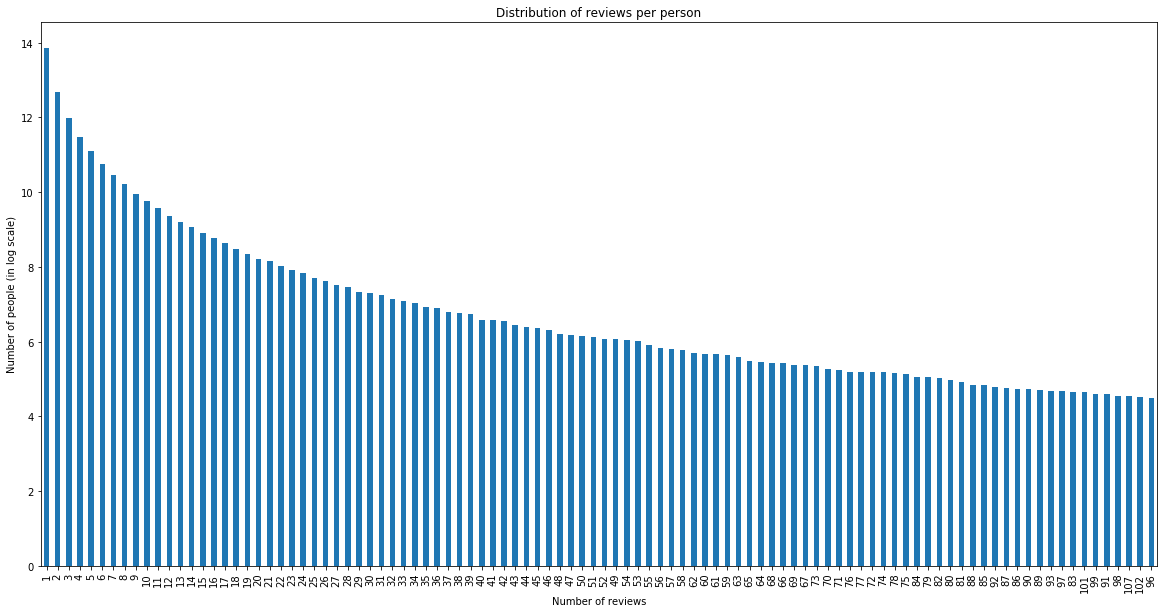

In [18]:
ax = np.log(dist_reviews[ :100]).plot(kind = 'bar', title = 'Distribution of reviews per person', figsize = (20,10))
ax.set_ylabel("Number of people (in log scale)")
ax.set_xlabel("Number of reviews")

##Person with the most reviews

In [19]:
max_rev_user_id = user.user_id[user.review_count == max(user.review_count)].values[0]
print('Name : %s' % (user.name[user.user_id == max_rev_user_id].values[0]))
print('Number of Reviews : %s' % (user.review_count[user.user_id == max_rev_user_id].values[0]))

person_most_reviews = review[review.user_id == max_rev_user_id]
print('First Review : %s' % min(person_most_reviews.date))
print('Latest Review : %s' % max(person_most_reviews.date))

Name : Victor
Number of Reviews : 14455
First Review : 2008-03-01 03:05:19
Latest Review : 2014-05-24 15:07:13


In [20]:
person_most_reviews

,review_id,user_id,business_id,stars,useful,text,date
126675,npvFgpL_EztB8jbENf9y6Q,8k3aO-mPeyhbR5HUucA5aA,J-U6C8FgveGsDdHwRB56OQ,5,43,Global Pharmacy Canada is an online website wh...,2011-11-06 13:43:01
363414,hsKnV3BM6se0VcnFM7RIMw,8k3aO-mPeyhbR5HUucA5aA,u_vPjx925UPEG9DFOAAvFQ,2,1,was this one of many casinos that didn't offer...,2008-03-01 03:17:42
419275,UnW63C7p_5FEAqcN9vUGgQ,8k3aO-mPeyhbR5HUucA5aA,J-U6C8FgveGsDdHwRB56OQ,1,55,"on or about june 25th, 2013, Global Pharmacy C...",2014-05-24 15:07:13
1050765,Hrlm9LvgiQTvmw0L5zOqOQ,8k3aO-mPeyhbR5HUucA5aA,ii8sAGBexBOJoYRFafF9XQ,3,0,i stayed here but don't remember much else. th...,2008-03-01 03:15:01
2281920,idtF1AP1tlTHMVJVmX4NzQ,8k3aO-mPeyhbR5HUucA5aA,na4Th5DrNauOv-c43QQFvA,3,2,"when i was there, this place spelled elegance ...",2008-03-01 03:08:49
3015364,lobDkv7bYpJXuG_ZBKPOUg,8k3aO-mPeyhbR5HUucA5aA,z7GAft_JrFNmAH5xbVeYSA,3,4,it was pretty cheap to fly to las vegas. depen...,2008-03-01 03:20:53
5883909,7M8WX2FErASIRdf68r_NIQ,8k3aO-mPeyhbR5HUucA5aA,DfgZlNgKwBvCpA_0alumXw,3,1,sure they give you free cohibas and cognac for...,2008-03-01 03:05:19
6535440,Cg544WBUSYsJZRP_zjUYYw,8k3aO-mPeyhbR5HUucA5aA,6Q7-wkCPc1KF75jZLOTcMw,1,2,"Decades ago, i booked low priced rooms here ...",2011-03-25 05:14:32


##Ratings

Text(0.5, 0, 'Rating of review')

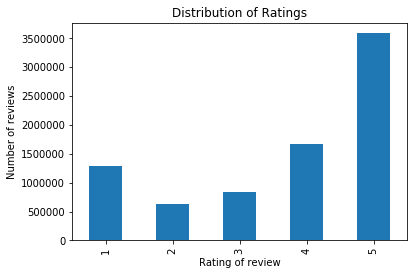

In [21]:
ax = review['stars'].value_counts().sort_index().plot(kind = 'bar', title = 'Distribution of Ratings')
ax.set_ylabel("Number of reviews")
ax.set_xlabel("Rating of review")

Text(0.5, 0, 'Average review rating')

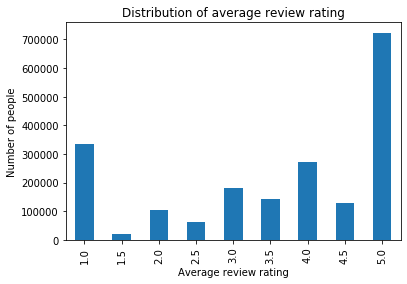

In [22]:
avg_rating_user = pd.Series(np.round(review[['stars', 'user_id']].groupby('user_id').mean()['stars'].values * 2) / 2)
ax = avg_rating_user.value_counts().sort_index().plot(kind = 'bar', title = 'Distribution of average review rating')

ax.set_ylabel("Number of people")
ax.set_xlabel("Average review rating")

In [23]:
avg_rating_user_elite = pd.Series(np.round(review[review.user_id.isin(elite_user_id)][['stars', 'user_id']].groupby('user_id').mean()['stars'].values * 2) / 2)
avg_rating_user_non_elite = pd.Series(np.round(review[~review.user_id.isin(elite_user_id)][['stars', 'user_id']].groupby('user_id').mean()['stars'].values * 2) / 2)

**Distribution of average review rating**

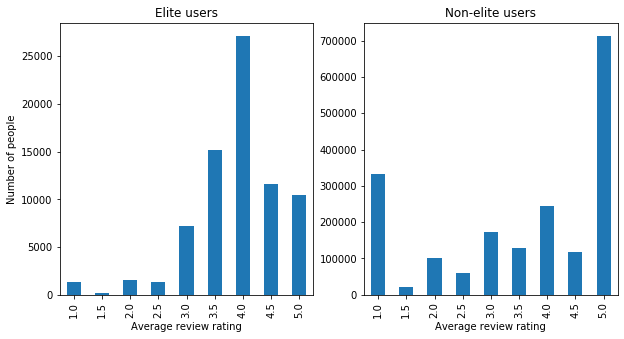

In [24]:
printmd('**Distribution of average review rating**')
plt.subplots(1, 2, figsize=(10, 5))
plt.subplot(1, 2, 1)
ax = avg_rating_user_elite.value_counts().sort_index().plot(kind = 'bar', title = 'Elite users')
ax.set_ylabel("Number of people")
ax.set_xlabel("Average review rating")
plt.subplot(1, 2, 2)
ax1 = avg_rating_user_non_elite.value_counts().sort_index().plot(kind = 'bar', title = 'Non-elite users')
ax1.set_xlabel("Average review rating")
print()

#Dropping Records that are not part of the analysis

In [44]:
business = business.dropna()

In [45]:
# Dropping non restaurants businesses
bus_cat_filter = business.categories.apply(lambda x: False if 'Restaurants' in x else True)
business.drop(business[bus_cat_filter].index, inplace = True)

In [46]:
# Dropping reviews of non restaurants and non-food business
rew_busniess_filter = review.business_id.isin(list(business.business_id))
review = review[rew_busniess_filter]

In [49]:
y = pd.get_dummies(business.categories.apply(pd.Series).stack()).sum(level = 0)
y = y.replace(0, np.NaN)
y

,"Acai Bowls, Food, Juice Bars & Smoothies, Breakfast & Brunch, Comfort Food, Restaurants, Donuts, Gelato, Bakeries, Coffee & Tea","Acai Bowls, Food, Restaurants, Desserts, Vegan","Acai Bowls, Ice Cream & Frozen Yogurt, Gluten-Free, Restaurants, Food, Juice Bars & Smoothies","Acai Bowls, Poke, Juice Bars & Smoothies, Gluten-Free, Vegan, Food, Restaurants","Acai Bowls, Poke, Juice Bars & Smoothies, Vegan, Food, Restaurants, Gluten-Free","Acai Bowls, Restaurants, Gluten-Free, Ice Cream & Frozen Yogurt, Juice Bars & Smoothies, Food","Acai Bowls, Restaurants, Juice Bars & Smoothies, Food, American (New), Sandwiches, Salad","Acai Bowls, Sandwiches, Salad, Juice Bars & Smoothies, Restaurants, Food","Acai Bowls, Vegan, Restaurants, Juice Bars & Smoothies, Vegetarian, Food, Fruits & Veggies, Specialty Food, Organic Stores","Accessories, Department Stores, Men's Clothing, Fashion, Restaurants, Shopping, Women's Clothing, Cosmetics & Beauty Supply, Shoe Stores, Beauty & Spas",...,"Wraps, Restaurants, Cafes, Breakfast & Brunch","Wraps, Restaurants, Food, Juice Bars & Smoothies","Wraps, Restaurants, Food, Juice Bars & Smoothies, Cafes, Salad, Sandwiches","Wraps, Restaurants, Salad","Wraps, Restaurants, Salad, Food, Juice Bars & Smoothies, Vegetarian, Sandwiches","Wraps, Salad, Burgers, Event Planning & Services, Restaurants, Caterers, Fast Food","Wraps, Salad, Event Planning & Services, Caterers, Sandwiches, Restaurants","Wraps, Salad, Food, Juice Bars & Smoothies, Restaurants","Wraps, Salad, Restaurants, Food, Juice Bars & Smoothies","Wraps, Sandwiches, Restaurants, Salad, Food, Acai Bowls"
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Avg restaurant rating
avg_restaurant_rating = review.groupby('business_id').mean()[['stars']]
avg_restaurant_rating.columns = ['avg_rating']
business = pd.merge(business, avg_restaurant_rating, how='inner', on=None, 
                     left_on='business_id', right_on=None,
                     left_index=False, right_index=True, sort=True,
                     suffixes=('_x', '_y'), copy=True, indicator=False,
                     validate=None)

In [ ]:
# One Hot Type Encoding of Business Categories

business_categories_df = pd.get_dummies(business.categories.apply(pd.Series).stack()).sum(level=0)
business_categories_counts = business_categories_df.sum().sort_values(ascending = False)

business_categories_drop = list(business_categories_counts[business_categories_counts < 10].index.values)
business_categories_drop.append('Restaurants')
business_categories_df.drop(columns = business_categories_drop, inplace = True)

business.drop(columns = ['categories'], inplace = True)
business = pd.concat([business, business_categories_df], axis=1)

business = business[business[business_categories_df.columns].sum(axis = 1) != 0]

print(business.columns, business.shape)

In [ ]:
ax = business_categories_df.sum().sort_values(ascending = False)[:20].plot(kind = 'bar', title = 'Most common restaurant categories')
ax.set_ylabel("Number of restaurants")
ax.set_xlabel("Food categories")

In [ ]:
# Merging dataset

alldf = pd.merge(business, review, how='inner', on=None, 
                     left_on='business_id', right_on='business_id',
                     left_index=False, right_index=False, sort=True,
                     suffixes=('_business', '_review'), copy=True, indicator=False,
                     validate=None)
alldf = pd.merge(alldf, user, how='inner', on=None, 
                     left_on='user_id', right_on='user_id',
                     left_index=False, right_index=False, sort=True,
                     suffixes=('', '_user'), copy=True, indicator=False,
                     validate=None)

In [ ]:
list_col = list(business_categories_df.columns.values)
user_cat_matrix = alldf.loc[:, list_col].multiply(alldf.stars_business, axis = 0).replace(0, np.NaN)
user_cat_matrix['user_id'] = alldf.user_id
user_cat_matrix = user_cat_matrix.groupby('user_id').mean()

In [ ]:
user_cat_matrix.head().replace(np.NaN, 0)

In [ ]:
mu = np.mean(review.stars)
mean_user_ratings = review[['user_id', 'stars']].groupby('user_id').mean()
mean_business_ratings = review[['business_id', 'stars']].groupby('business_id').mean()